<a href="https://colab.research.google.com/github/noda3/2022/blob/main/connector_trace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# print(tf.__version__)
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,plot_roc_curve

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
test_labels[0]

9

In [8]:
test_labs = tf.one_hot(test_labels[0],7)
print(test_labs)

tf.Tensor([0. 0. 0. 0. 0. 0. 0.], shape=(7,), dtype=float32)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names = np.arange(10)
class_names


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

ラベルはそれぞれ、0 から 9 までの間の整数です。

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

テスト用データセットには、10,000 の画像が含まれます。画像は 28 × 28 ピクセルで構成されています。

In [ ]:
test_images.shape

(10000, 28, 28)

テスト用データセットには 10,000 のラベルが含まれます。

In [ ]:
len(test_labels)

10000

## データの前処理

ネットワークをトレーニングする前に、データを前処理する必要があります。最初の画像を調べてみればわかるように、ピクセルの値は 0 から 255 の間の数値です。

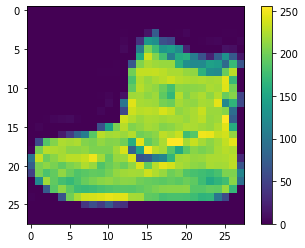

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

これらの値をニューラルネットワークモデルに供給する前に、0 から 1 の範囲にスケーリングします。これを行うには、値を 255 で割ります。*トレーニングセット*と*テストセット*を同じ方法で前処理することが重要です。

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**訓練用データセット**の最初の25枚の画像を、クラス名付きで表示してみましょう。ネットワークを構築・訓練する前に、データが正しいフォーマットになっていることを確認します。

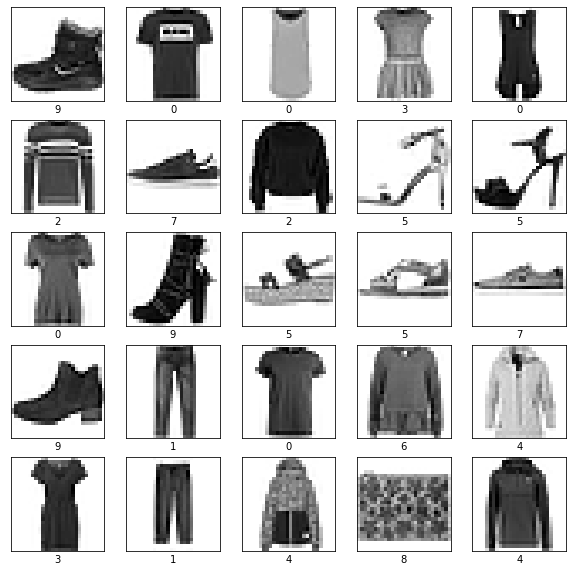

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    # tf.keras.layers.Dense(10)
    tf.keras.layers.Dense(1)
])

In [ ]:
# model.compile(optimizer='adam',
            #   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            #   metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.mse,
              metrics=['mse','mae'])


In [ ]:
example_batch = train_images[:10]
example_result = model.predict(example_batch)
example_result,train_labels[:10]

(array([[0.78505355],
        [1.2988458 ],
        [0.39428157],
        [0.5605196 ],
        [0.72685087],
        [1.2493669 ],
        [0.31038454],
        [1.455374  ],
        [0.5118704 ],
        [0.96036506]], dtype=float32),
 array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))

In [ ]:
ex_cp = example_result.copy()
tf.cast(ex_cp, tf.uint8)

<tf.Tensor: shape=(10, 1), dtype=uint8, numpy=
array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]], dtype=uint8)>

In [ ]:
ex_cp2 = example_result.copy()
ex_cp2.astype(int)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
history=model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.0103 - mse: 1.0103 - mae: 0.5764 - val_loss: 1.2201 - val_mse: 1.2201 - val_mae: 0.6085
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9866 - mse: 0.9866 - mae: 0.5627 - val_loss: 1.2145 - val_mse: 1.2145 - val_mae: 0.6217
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9579 - mse: 0.9579 - mae: 0.5506 - val_loss: 1.2429 - val_mse: 1.2429 - val_mae: 0.6205
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9399 - mse: 0.9399 - mae: 0.5447 - val_loss: 1.2036 - val_mse: 1.2036 - val_mae: 0.6145
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9107 - mse: 0.9107 - mae: 0.5297 - val_loss: 1.2411 - val_mse: 1.2411 - val_mae: 0.5887
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8986 - mse: 0.8986 - mae: 0.5265 - val_loss: 1.2074 - val_mse: 1.2074 - val_mae: 0.5808
Ep

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
5,0.898600,0.898600,0.526542,1.207362,1.207362,0.580773,5
6,0.874979,0.874979,0.514384,1.223009,1.223009,0.585205,6
7,0.866031,0.866031,0.512602,1.208295,1.208295,0.582688,7
8,0.846924,0.846924,0.502490,1.306823,1.306823,0.607649,8
9,0.850731,0.850731,0.504303,1.226583,1.226583,0.607779,9


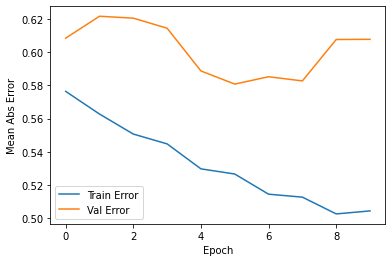

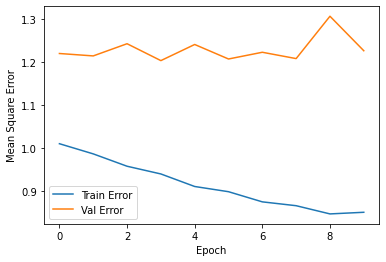

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

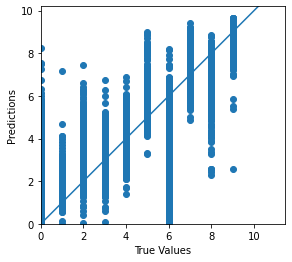

In [ ]:
test_predictions = model.predict(test_images).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
test_predictions

array([9.100869  , 1.843637  , 0.93223685, ..., 6.786978  , 0.8415    ,
       4.8697305 ], dtype=float32)

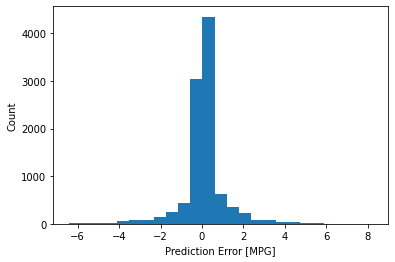

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
test_pred_labs = test_predictions.astype(int)
test_pred_labs,test_labels

(array([9, 1, 0, ..., 6, 0, 4]), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [ ]:
u, counts = np.unique(test_pred_labs, return_counts=True)
u,counts

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([   2, 1463,  550, 1041, 1497, 1058, 1209,  449, 1103,  774,  854]))

In [ ]:
cls=[str(v) for v in class_names]
cls

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
cm = confusion_matrix(test_labels, test_pred_labs)
cm

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2, 617, 147,  94,  70,  42,  20,   4,   3,   1,   0],
       [  0, 798, 152,  35,  11,   3,   0,   0,   1,   0,   0],
       [  0,   7, 179, 459, 244,  80,  22,   8,   1,   0,   0],
       [  0,   4,  34, 317, 590,  45,   8,   2,   0,   0,   0],
       [  0,   0,   3,  46, 440, 463,  41,   7,   0,   0,   0],
       [  0,   0,   0,   0,   2, 199, 716,  52,  14,  17,   0],
       [  0,  37,  35,  84, 135, 211, 355, 134,   7,   2,   0],
       [  0,   0,   0,   0,   0,   1,  14, 185, 737,  58,   5],
       [  0,   0,   0,   5,   5,  14,  30,  55, 309, 582,   0],
       [  0,   0,   0,   1,   0,   0,   3,   2,  31, 114, 849]])

In [ ]:
u,class_names

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

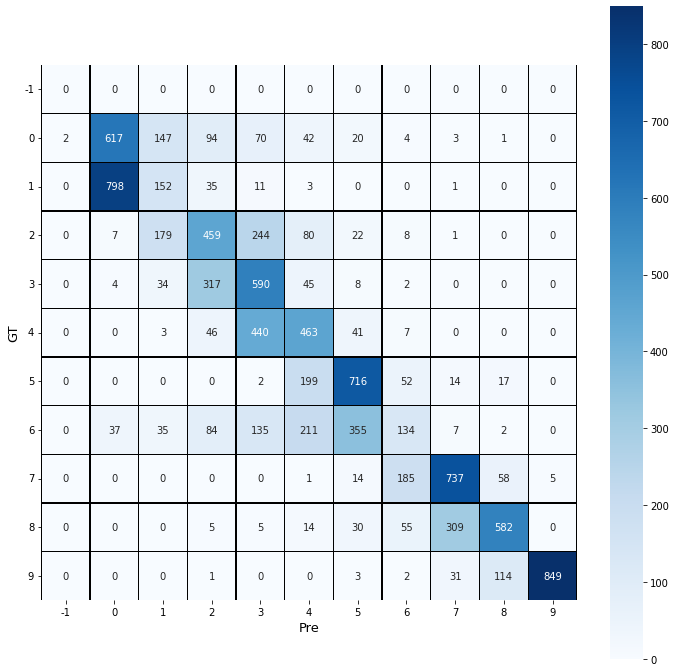

In [ ]:
cmdf = pd.DataFrame(data=cm, index=u, columns=u)
plt.figure(figsize=(12,12))
sns.heatmap(cmdf, square=True, cbar=True, annot=True, cmap='Blues',fmt="d",linewidths=.3,linecolor="k")
plt.yticks(rotation=0)
plt.xlabel("Pre", fontsize=13, rotation=0)
plt.ylabel("GT", fontsize=13)
# ax.set_ylim(len(cm), 0)
plt.show()


In [ ]:
print(classification_report(test_labels,test_pred_labs ))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.42      0.62      0.50      1000
           1       0.28      0.15      0.20      1000
           2       0.44      0.46      0.45      1000
           3       0.39      0.59      0.47      1000
           4       0.44      0.46      0.45      1000
           5       0.59      0.72      0.65      1000
           6       0.30      0.13      0.18      1000
           7       0.67      0.74      0.70      1000
           8       0.75      0.58      0.66      1000
           9       0.99      0.85      0.92      1000

    accuracy                           0.53     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.53      0.53      0.52     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
